In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/nlp_vader_textblob_classified_data.xlsx')

In [ ]:
df.head()

,username,verified,followersCount,content,label,date,country,replyCount,retweetCount,likeCount,...,vader_neg,vader_neu,vader_pos,vader_comp,cleantext2,class,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,final_class
0,HuyThanhNguyen5,False,0,@unitedstandmufc @markgoldbridge get ole again...,-1.0,2022-08-31 15:12:54,India,0,0,0,...,0.046,0.819,0.134,0.7133,g e t o l e a g a i n t o t e l l ...,-1,0.600000,0.290000,1,-1
1,guaslackjack,False,125,best goal: bruno top assists: pogba 🐐: cristia...,1.0,2021-09-11 15:56:21,India,0,0,0,...,0.000,0.561,0.439,0.8225,b e s t g o a l : b r u n o t o p a s ...,1,0.400000,0.533333,1,1
2,gerryrb,False,935,@lost_souls_07 @kayinfinite28 @altyred2 @utdpl...,0.0,2022-09-03 14:29:34,Argentina,1,0,1,...,0.000,0.505,0.495,0.9562,i d o n o t k n o w i s t h ...,1,0.783333,0.450000,1,0
3,rickitten_,False,9,players spurs in old trafford #mufc #muntot ht...,0.0,2022-03-12 19:14:18,India,0,0,0,...,0.000,1.000,0.000,0.0000,p l a y e r s s p u r s i n o l d t r ...,0,0.200000,0.100000,1,0
4,saboteurDS,False,278,@tancredipalmeri why on earth would #mufc pay ...,-1.0,2022-08-28 12:07:34,India,0,0,2,...,0.045,0.643,0.312,0.8072,w h y o n e a r t h w o u l d p a ...,-1,0.500000,0.500000,1,-1


In [ ]:
df.shape

(97398, 25)

In [ ]:
train=df[df['label'].isnull()]

In [ ]:
train.head()

,username,verified,followersCount,content,label,date,country,replyCount,retweetCount,likeCount,...,vader_neg,vader_neu,vader_pos,vader_comp,cleantext2,class,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,final_class
741,kiren98_,False,2112,@egbon_adu_gbo @utdplug @theathleticuk because...,NaN,2022-08-31 09:08:52,India,0,0,1,...,0.095,0.772,0.133,0.2960,b e c a u s e a l o t o f l e a k ...,-1,0.416667,4.163336e-17,1,-1
742,Mike_Ragnarsson,False,6,@utdplug @lauriewhitwell man utd couldn't be a...,NaN,2022-09-03 13:43:26,Argentina,1,0,0,...,0.072,0.735,0.193,0.7947,m a n u t d c o u l d n o t b e ...,-1,0.325758,2.393939e-01,1,-1
743,krystal_mchugh,False,332,man united is the most disappointing team righ...,NaN,2022-08-13 17:03:15,United States,1,0,0,...,0.305,0.564,0.131,-0.5709,m a n u n i t e d i s t h e m o s t ...,-1,0.633929,-1.535714e-01,-1,-1
744,Jessmawill_,False,2424,man u and arsenal predictions?? #munars,NaN,2021-12-02 16:32:22,Nigeria,2,0,1,...,0.000,1.000,0.000,0.0000,m a n y o u a n d a r s e n a l p r e ...,0,0.000000,0.000000e+00,0,0
745,falahmohamed,False,253,"@unitedstandmufc liverpool 24, united 0",NaN,2022-08-22 12:50:19,India,0,0,0,...,0.000,0.517,0.483,0.4215,"l i v e r p o o l 2 4 , u n i t e d 0",1,0.000000,0.000000e+00,0,1


In [ ]:
train = train[train['vader_preprocessing_text'].notnull()]

In [ ]:
train['final_class'].value_counts()

 1    33059
 0    30185
-1    29451
Name: final_class, dtype: int64

In [ ]:
test=df[df['label'].notnull()]

In [ ]:
test = test[test['vader_preprocessing_text'].notnull()]

In [ ]:
test.head()

,username,verified,followersCount,content,label,date,country,replyCount,retweetCount,likeCount,...,vader_neg,vader_neu,vader_pos,vader_comp,cleantext2,class,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,final_class
0,HuyThanhNguyen5,False,0,@unitedstandmufc @markgoldbridge get ole again...,-1.0,2022-08-31 15:12:54,India,0,0,0,...,0.046,0.819,0.134,0.7133,g e t o l e a g a i n t o t e l l ...,-1,0.600000,0.290000,1,-1
1,guaslackjack,False,125,best goal: bruno top assists: pogba 🐐: cristia...,1.0,2021-09-11 15:56:21,India,0,0,0,...,0.000,0.561,0.439,0.8225,b e s t g o a l : b r u n o t o p a s ...,1,0.400000,0.533333,1,1
2,gerryrb,False,935,@lost_souls_07 @kayinfinite28 @altyred2 @utdpl...,0.0,2022-09-03 14:29:34,Argentina,1,0,1,...,0.000,0.505,0.495,0.9562,i d o n o t k n o w i s t h ...,1,0.783333,0.450000,1,0
3,rickitten_,False,9,players spurs in old trafford #mufc #muntot ht...,0.0,2022-03-12 19:14:18,India,0,0,0,...,0.000,1.000,0.000,0.0000,p l a y e r s s p u r s i n o l d t r ...,0,0.200000,0.100000,1,0
4,saboteurDS,False,278,@tancredipalmeri why on earth would #mufc pay ...,-1.0,2022-08-28 12:07:34,India,0,0,2,...,0.045,0.643,0.312,0.8072,w h y o n e a r t h w o u l d p a ...,-1,0.500000,0.500000,1,-1


# Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
tfidf=TfidfVectorizer()
tweet_tfidf_train=tfidf.fit_transform(train['cleantext_no_spell'])

In [ ]:
MNB=MultinomialNB()
MNB.fit(tweet_tfidf_train,train['final_class'])

MultinomialNB()

In [ ]:
from sklearn import metrics
tweet_tfidf_eval=tfidf.transform(test['cleantext_no_spell'])
predicted=MNB.predict(tweet_tfidf_eval)
accuracy_score=metrics.accuracy_score(predicted,test['label'])

In [ ]:
precision = round(metrics.precision_score(test['label'],predicted, average="weighted"), 3)
recall = round(metrics.recall_score(test['label'],predicted, average="weighted"), 3)
nb_f1_score = round(metrics.f1_score(test['label'], predicted, average="weighted"), 3)

In [ ]:
print("Accuracy: ", accuracy_score)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", nb_f1_score)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


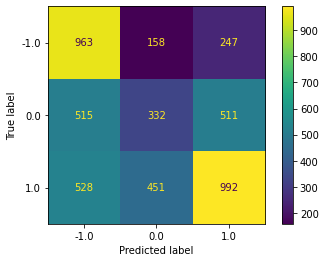

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(MNB, tweet_tfidf_eval, test['label']) 
plt.show()

In [ ]:
tfidf=TfidfVectorizer()
tweet_tfidf_train=tfidf.fit_transform(train['vader_preprocessing_text'])

In [ ]:
MNB=MultinomialNB()
MNB.fit(tweet_tfidf_train,train['final_class'])

MultinomialNB()

In [ ]:
from sklearn import metrics
tweet_tfidf_eval=tfidf.transform(test['vader_preprocessing_text'])
predicted=MNB.predict(tweet_tfidf_eval)
accuracy_score=metrics.accuracy_score(predicted,test['label'])

In [ ]:
precision = round(metrics.precision_score(test['label'],predicted, average="weighted"), 3)
recall = round(metrics.recall_score(test['label'],predicted, average="weighted"), 3)
nb_f1_score = round(metrics.f1_score(test['label'], predicted, average="weighted"), 3)

In [ ]:
print("Accuracy: ", accuracy_score)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", nb_f1_score)

Accuracy:  0.4815839897807111
Precision:  0.473
Recall:  0.482
F1_score:  0.469


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


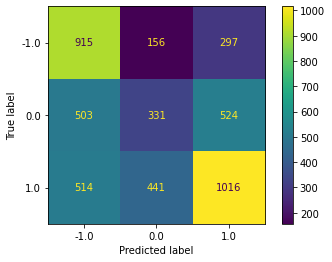

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(MNB, tweet_tfidf_eval, test['label']) 
plt.show()

# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
tfidf=TfidfVectorizer()
tweet_tfidf_train=tfidf.fit_transform(train['cleantext_no_spell'])
GNB.fit(tweet_tfidf_train.toarray(),train['final_class'])

In [ ]:
from sklearn import metrics
tweet_tfidf_eval=tfidf.transform(eval['processed_content'])
predicted=GNB.predict(tweet_tfidf_eval.toarray())
accuracy_score=round(metrics.accuracy_score(predicted,eval['sentiment']), 3)

In [ ]:
precision = round(metrics.precision_score(eval['sentiment'],predicted, average="weighted"), 3)
recall = round(metrics.recall_score(eval['sentiment'],predicted, average="weighted"), 3)
nb_f1_score = round(metrics.f1_score(eval['sentiment'], predicted, average="weighted"), 3)

In [ ]:
print("Accuracy: ", accuracy_score)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", nb_f1_score)

Accuracy:  0.413
Precision:  0.468
Recall:  0.413
F1_score:  0.421


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


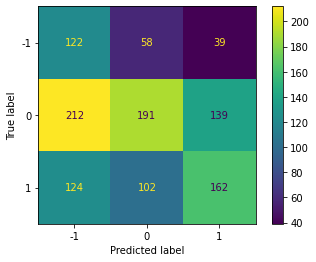

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(GNB, tweet_tfidf_eval.toarray(), eval['sentiment']) 
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

tfidf=TfidfVectorizer()
tweet_tfidf_train=tfidf.fit_transform(train['cleantext_no_spell'])

tweet_tfidf_eval=tfidf.transform(test['cleantext_no_spell'])
rf = RandomForestClassifier()
scores = cross_val_score(rf,tweet_tfidf_train,train['final_class'],cv=5)

In [ ]:
print(scores)
scores.mean()

[0.78677383 0.80559901 0.82145747 0.77528454 0.76508981]


0.7908409299314958

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5,50,100],
    'max_depth': [2,10,20,None]
}

cv = GridSearchCV(rf,parameters)
cv.fit(tweet_tfidf_train,train['final_class'])
print_results(cv)

BEST PARAMS: {'max_depth': None, 'n_estimators': 100}

0.398 (+/-0.062) for {'max_depth': 2, 'n_estimators': 5}
0.373 (+/-0.006) for {'max_depth': 2, 'n_estimators': 50}
0.371 (+/-0.007) for {'max_depth': 2, 'n_estimators': 100}
0.51 (+/-0.034) for {'max_depth': 10, 'n_estimators': 5}
0.61 (+/-0.021) for {'max_depth': 10, 'n_estimators': 50}
0.613 (+/-0.021) for {'max_depth': 10, 'n_estimators': 100}
0.564 (+/-0.049) for {'max_depth': 20, 'n_estimators': 5}
0.659 (+/-0.027) for {'max_depth': 20, 'n_estimators': 50}
0.666 (+/-0.02) for {'max_depth': 20, 'n_estimators': 100}
0.693 (+/-0.059) for {'max_depth': None, 'n_estimators': 5}
0.782 (+/-0.043) for {'max_depth': None, 'n_estimators': 50}
0.791 (+/-0.043) for {'max_depth': None, 'n_estimators': 100}


In [ ]:
rf3 = RandomForestClassifier(n_estimators=50,max_depth=None)
rf3.fit(tweet_tfidf_train,train['final_class'])

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred = rf3.predict(tweet_tfidf_eval)
accuracy = round(metrics.accuracy_score(test['label'],y_pred), 3)
precision = round(metrics.precision_score(test['label'],y_pred,average="weighted"), 3)
recall = round(metrics.recall_score(test['label'],y_pred,average="weighted"), 3)
rf_f1_score = round(metrics.f1_score(test['label'], y_pred, average="weighted"), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf3.max_depth,
                                                                         rf3.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: None / # OF EST: 50 -- A: 0.445 / P: 0.456 / R: 0.445


In [ ]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", rf_f1_score)

Accuracy:  0.445
Precision:  0.456
Recall:  0.445
F1_score:  0.445


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


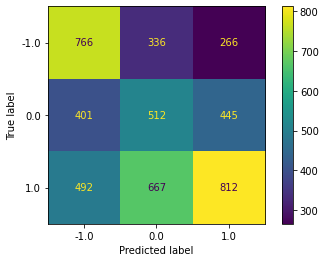

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf3, tweet_tfidf_eval, test['label']) 
plt.show()